### **Regression with Neuroscope**

Regression example using NeuroScope with comprehensive
diagnostic analysis. Demonstrates linear output activation, mean squarred error loss (mse), and specialized regression metrics.

This example covers:
- Regression setup  in neuroscope
- linear activation and mse loss
- Regression-specific metrics and diagnostics
---
**Author:** Ahmad Raza | **Date:** September 2025


#### **Step 1: Import Essential Components**

Same NeuroScope toolkit, but we'll configure everything for continuous value prediction.

In [ ]:
# Necessary imports
import numpy as np
from neuroscope import (
    MLP, 
    PreTrainingAnalyzer, 
    TrainingMonitor, 
    PostTrainingEvaluator, 
    Visualizer
)

#### **Step 2: Data Generation Functions**
For regression, we'll generate continuous target values instead of discrete classes. The relationship between inputs and outputs will be more subtle.

In [2]:
# synthetic data generation
def generate_synthetic_data(samples, features=20, classes=None, noise=0.1, random_state=None):
    """Generate synthetic data for classification or regression."""
    rng = np.random.default_rng(random_state)

    if classes is None:
        X = rng.normal(0, 1, size=(samples, features))
        weights = rng.normal(0, 1, size=(features, 1))
        y = X @ weights + noise * rng.normal(0, 1, size=(samples, 1))
        y = y.squeeze()
    else:
        X = rng.normal(0, 1, size=(samples, features))
        weights = rng.normal(0, 1, size=(classes, features))
        logits = X @ weights.T + noise * rng.normal(0, 1, size=(samples, classes))
        y = np.argmax(logits, axis=1)
    
    return X, y
    

In [3]:
# split data function
def split_data(X, y, train_ratio=0.7, val_ratio=0.15):
    """Split data into train, validation, and test sets."""
    n_samples = X.shape[0]
    n_train = int(n_samples * train_ratio)
    n_val = int(n_samples * val_ratio)

    # Shuffle indices
    indices = np.random.permutation(n_samples)

    # Split indices
    train_idx = indices[:n_train]
    val_idx = indices[n_train : n_train + n_val]
    test_idx = indices[n_train + n_val :]

    return (
        X[train_idx],
        y[train_idx],
        X[val_idx],
        y[val_idx],
        X[test_idx],
        y[test_idx],
    )

#### **Step 3: Create Our Dataset**

Notice `classes=None` - this tells our function to generate continuous targets. Higher noise makes the problem more realistic.

In [4]:
# Generate and split data
X, y = generate_synthetic_data(samples=2000, features=20, noise=0.2, random_state=42)
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

#### **Step 4: Verify Data Shapes and Explore Target Distribution**
Always check your data dimensions to catch potential issues early. This helps prevent mysterious errors later!

In [5]:
print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Classes in dataset: {len(np.unique(y))}")

In [6]:
print(f"Input shape: {X_train.shape}")
print(f"Target statistics:")
print(f"  Mean: {y_train.mean():.3f}")
print(f"  Std:  {y_train.std():.3f}")
print(f"  Min:  {y_train.min():.3f}")
print(f"  Max:  {y_train.max():.3f}")

Input shape: (1400, 20)
Target statistics:
  Mean: -0.009
  Std:  4.859
  Min:  -13.701
  Max:  14.800


#### **Step 5: Design Your Neural Network**

Key differences for regression:
- **Output layer:** 1 neuron (single continuous value)
- **No output activation:** Linear output (can be any real number)
- **Simpler architecture:** Fewer parameters needed

In [7]:
# Initialize MLP model for regression
model = MLP(
        layer_dims=[20, 20, 1],  # Input -> Hidden -> Hidden -> Output
        hidden_activation="leaky_relu",  # Leaky ReLU for hidden layers
        out_activation=None,  # No activation for output layer (linear)
        dropout_rate=0.2,  # 0% dropout for regularization
    )


#### **Step 6: Compile the model**

Regression typically uses Mean Squared Error (MSE) loss, which NeuroScope handles automatically when detecting continuous targets.

In [8]:
# Compile the model
model.compile(
        optimizer="adam",  # Adam optimizer
        lr=0.001,  # Learning rate
        reg="l2",  # L2 regularization
        lamda=0.1,  # Regularization strength
    )

                    MLP ARCHITECTURE SUMMARY
Layer        Type               Output Shape    Params    
---------------------------------------------------------------
Layer 1      Input → Hidden     (20,)           420       
Layer 2      Hidden → Output    (1,)            21        
---------------------------------------------------------------
TOTAL                                           441       
Hidden Activation                               leaky_relu
Output Activation                               Linear
Optimizer                                       Adam
Learning Rate                                   0.001
Dropout                                         20.0% (normal)
L2 Regularization                               λ = 0.1


#### **Step 7: Pre-Training Analysis**

NeuroScope's pre-training analyzer performs comprehensive checks before training begins. This catches potential issues that could derail training.

In [9]:
# Pre-training analysis
analyzer = PreTrainingAnalyzer(model)
analyzer.analyze(X_train, y_train)

                         NEUROSCOPE PRE-TRAINING ANALYSIS
DIAGNOSTIC TOOL             STATUS       RESULT         NOTE                                      
------------------------------------------------------------------------------------------
Initial Loss Check          PASS         23.1805        Perfect loss init                         
Initialization Validation   PASS         2 layers       Good weight init                          
Layer Capacity Analysis     PASS         441 params     No bottlenecks                            
Architecture Sanity Check   PASS         0I/0W          Architecture is fine                      
Capacity vs Data Ratio      PASS         441 params     Excellent model size                      
Convergence Feasibility     PASS         66.7%          Good convergence potential                
------------------------------------------------------------------------------------------
OVERALL STATUS: ALL SYSTEMS READY
TESTS PASSED: 6/6


#### **Step 8: Training with Real-Time Monitoring**

Now let's train with NeuroScope's advanced monitoring. Watch the diagnostic indicators - they tell you exactly what's happening inside your network!

In [10]:
# Training with monitoring
monitor = TrainingMonitor()
history = model.fit(
        X_train,
        y_train,
        X_val=X_val,
        y_val=y_val,
        epochs=40,
        batch_size=32,
        monitor=monitor,
        metric='r2'
    )

----------------------------------------------------------------------------------------------------
SNR: 🟡 (0.62),     | Dead Neurons: 🟢 (0.00%)  | VGP:      🟢  | EGP:     🔴  | Weight Health: 🟢
WUR: 🟢 (2.12e-03)  | Saturation:   🟢 (0.00)   | Progress: 🟢  | Plateau: 🟢  | Overfitting:   🟡
----------------------------------------------------------------------------------------------------
Epoch   1  Train loss: 20.188092, Train R²: 0.1448 Val loss: 17.3761617, Val R²: 0.15109
----------------------------------------------------------------------------------------------------
SNR: 🟡 (0.63),     | Dead Neurons: 🟢 (0.00%)  | VGP:      🟢  | EGP:     🟢  | Weight Health: 🟢
WUR: 🟢 (2.05e-03)  | Saturation:   🟢 (0.00)   | Progress: 🟢  | Plateau: 🟢  | Overfitting:   🟢
----------------------------------------------------------------------------------------------------
Epoch   2  Train loss: 17.209626, Train R²: 0.2710 Val loss: 14.8085049, Val R²: 0.27658
------------------------------------------

#### **Step 9: Visualize Training Progress**

NeuroScope's visualizer creates high quality plots. The learning curves show how loss decreases and r2 improves over time.

In [11]:
# Initialize visualizer
viz = Visualizer(history)

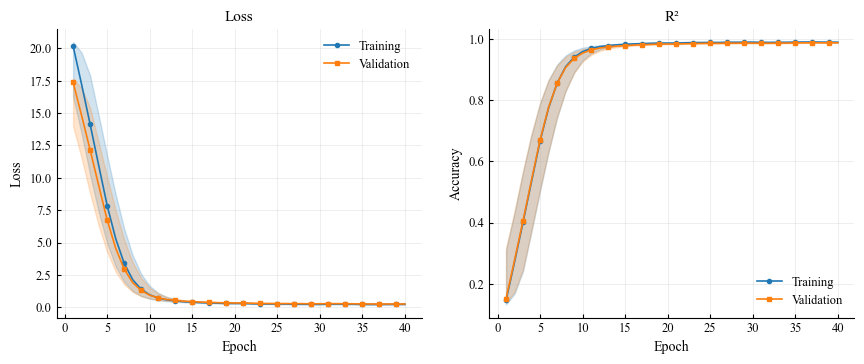

In [12]:
# plot learning curves
viz.plot_learning_curves(ci=True, markers=True)

In [13]:
# plot training animation (uncomment to use)
#viz.plot_training_animation(bg="light")

#### **Step 10: Final Model Evaluation**

Time for the moment of truth! Let's see how well our model performs on completely unseen test data.

In [14]:
# Post-training evaluation
evaluator = PostTrainingEvaluator(model)
evaluator.evaluate(X_test, y_test)

                  NEUROSCOPE POST-TRAINING EVALUATION
EVALUATION      STATUS       SCORE        NOTE                                         
--------------------------------------------------------------------------------
Robustness      EXCELLENT    1.841        Highly robust to noise                       
Performance     FAIL         0.185        Poor performance                             
Stability       WARN         0.503        Moderate stability issues                    
--------------------------------------------------------------------------------
OVERALL STATUS: ISSUES DETECTED
EVALUATIONS PASSED: 1/3
                     REGRESSION METRICS
METRIC               STATUS       SCORE        NOTE                                    
--------------------------------------------------------------------------------
R² Score             EXCELLENT    0.9910       Outstanding fit                         
Mean Absolute Error  WARN         0.3244       Moderate error                  

### **Regression Mastery Achieved!**

You've successfully conquered continuous value prediction with NeuroScope!

### **Key Regression Concepts:**
- **Linear output activation:** No constraints on output values
- **MSE loss function:** Penalizes large prediction errors heavily
- **R² metric:** Measures how much variance your model explains
- **Continuous predictions:** Real-valued outputs instead of categories
- **Prediction analysis:** Scatter plots and error metrics

#### **Regression vs Classification:**
| Aspect | Classification | Regression |
|--------|---------------|------------|
| **Output** | Categories (0, 1, 2...) | Real numbers (-∞ to +∞) |
| **Activation** | Sigmoid/Softmax | Linear (none) |
| **Loss** | Crossentropy | MSE |
| **Metric** | Accuracy | R² |
| **Goal** | Classify | Predict value |

#### **Understanding R² Scores:**
- **R² = 1.0:** Perfect predictions
- **R² = 0.8+:** Excellent model
- **R² = 0.5-0.8:** Good model
- **R² < 0.5:** Needs improvement
- **R² < 0:** Worse than predicting the mean!

#### **Next Adventure:**
Ready to explore **High-Performance Training**? Learn how to make your models train lightning-fast!

**You're becoming a NeuroScope expert!**